# DATA COLLECTION

In [7]:
import selenium
from selenium import webdriver

In [10]:
browser=webdriver.Chrome(r'C:\Users\guptaek\Fliprobo\chromedriver.exe')
browser.maximize_window()

### Collecting data from Flipkart

In [547]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

In [92]:
##making a function to scrape data of the given url as parameter
def scrapper(href):
    browser.get(href)
    urls=[]
    run=True
    for i in range(30):
        if(run==True):
            urls=urls+ [i.get_attribute('href') for i in browser.find_elements_by_xpath("//div[@class='_2kHMtA']/a[@class='_1fQZEK']")]
        #except:
           # urls=urls+ [i.get_attribute('href') for i in browser.find_elements_by_xpath("//div[@class='_4ddWXP']/a[@class='_2rpwqI']")]
        if((len(urls)==0) | (run==False)):
            urls=urls+ [i.get_attribute('href') for i in browser.find_elements_by_xpath("//div[@class='_4ddWXP']/a[@class='_2rpwqI']")]
            run=False
        try:WebDriverWait(browser,10).until(EC.visibility_of_element_located((By.XPATH,"//a[@class='_1LKTO3']")))
        except: break
        browser.get(browser.find_elements_by_xpath("//a[@class='_1LKTO3']")[-1].get_attribute('href'))
        

    reviews=[]
    ratings=[]
    for url in urls:
        browser.get(url)
        rating_sections=browser.find_elements_by_xpath("//div[@class='_2c2kV-']/div[@class='_16PBlm']")
        for i in rating_sections:
            try:ratings.append(i.find_element_by_xpath(".//div[@class='col']/div[@class='col _2wzgFH']/div[@class='row']/div[1]").text)
            except: ratings.append('NA')
            try:reviews.append(i.find_element_by_xpath(".//div[@class='col']/div[@class='col _2wzgFH']/div[@class='row']/div[@class='t-ZTKy']/div[1]/div[1]").text)
            except:reviews.append('NA')
                
    return pd.DataFrame({'Reviews':reviews,'Ratings':ratings })

In [548]:
mobiles='https://www.flipkart.com/search?q=mobile+phones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'
laptops='https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'
watches='https://www.flipkart.com/search?q=smart+watches&sid=ajy%2Cbuh&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_11_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_11_na_na_na&as-pos=1&as-type=RECENT&suggestionId=smart+watches%7CSmart+Watches&requestId=db6c201a-7ccf-4551-b6fd-9e850852b96d&as-backfill=on&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'
monitors='https://www.flipkart.com/search?q=monitors&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'

headphones='https://www.flipkart.com/search?q=headphones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'
cameras='https://www.flipkart.com/search?q=professional+cameras&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_11_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_11_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=professional+cameras&requestId=2568fa45-685e-48ce-8035-eaa1bc19578f&as-searchtext=profession+&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'
printers='https://www.flipkart.com/search?q=printers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'
hometheaters='https://www.flipkart.com/search?q=home+theater&sid=0pm%2C0o7&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=home+theater%7CSpeakers&requestId=04958003-5e07-4306-ae25-9efee6115ae1&as-searchtext=home+&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'
routers='https://www.flipkart.com/search?q=routers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove&sort=price_asc'
security_cameras='https://www.flipkart.com/search?q=security+camera&sid=igc%2Cj69%2Cagd&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_9_na_na_na&as-pos=1&as-type=RECENT&suggestionId=security+camera%7CSecurity+Cameras&requestId=f4cd3209-2417-4825-87cb-c6351cd997d0&as-searchtext=security%20'
ac='https://www.flipkart.com/search?q=air+conditioners&sid=j9e%2Cabm%2Cc54&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&otracker1=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_ps&as-pos=1&as-type=RECENT&suggestionId=air+conditioners%7CAir+Conditioners&requestId=4b8dc5ac-e28f-4ddd-a1ea-8f2e8afdcdfb&as-searchtext=air%20c'
fans='https://www.flipkart.com/search?q=fans+ceiling+fans&sid=j9e%2Cabm%2Clbz&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_4_na_na_na&as-pos=1&as-type=RECENT&suggestionId=fans+ceiling+fans%7CFans&requestId=a15ab0af-4563-4759-8216-01ad05ea0318&as-backfill=on'

pd_='https://www.flipkart.com/search?q=pendrives&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
desktop='https://www.flipkart.com/search?q=desktop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove'
speakers='https://www.flipkart.com/search?q=speakers&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove'
tablets='https://www.flipkart.com/search?q=tablets&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&p%5B%5D=facets.rating%255B%255D%3D1%25E2%2598%2585%2B%2526%2Babove'

In [171]:
##########scraping reviews of mobile phones
df=scrapper(mobiles)
#########scraping reviews of laptops
df1=scrapper(laptops)
#########scraping reviews of watches
df2=scrapper(watches)
#########scraping reviews of monitors
df3=scrapper(monitors)
##########scrapping data for headphones
df4=scrapper(headphones)

##########scrapping data for cameras
df5=scrapper(cameras)

##########scrapping data for printers
df6=scrapper(printers)

##########scrapping data for home theater
df7=scrapper(hometheaters)

##########scrapping data for home theater
df8=scrapper(routers)
########## scrapping data for security cameras
df9=scrapper(security_cameras)
########### scraping data for ac
df10=scrapper(ac)
############## scrapping data for fans
df11=scrapper(fans)

df12=scrapper(pd_)
df13=scrapper(desktop)
df14=scrapper(speakers)
df15=srapper(tablets)

In [ ]:
df_=pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15],axis=0,ignore_index=True)

## Scraping data from Amazon

In [582]:
##### preparing a fuction to scrap data from Amazon
def amazon_data_scrapper(href):
    browser.get(href)
    urls=[]
    value=True
    for i in range(19):
        if(value==True):
            url_tags=browser.find_elements_by_xpath("//div[@class='a-section a-spacing-medium']/div[@class='a-section a-spacing-none a-spacing-top-small']/h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a[@class='a-link-normal a-text-normal']")
        if((value==False) | (len(url_tags)==0)):
            url_tags=browser.find_elements_by_xpath("//div[@class='sg-col-inner']/div[@class='a-section a-spacing-none']/h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-2']/a")
            value=False
        urls+=[i.get_attribute('href') for i in url_tags]
        try: next_page=browser.find_element_by_xpath("//div[@class='a-text-center']/ul[@class='a-pagination']/li[@class='a-last']/a")
        except: break
        browser.get(next_page.get_attribute('href'))

    reviews=[]
    ratings=[]

    for url in urls:
        ## browse through each product url one by one
        browser.get(url)
        ## collect all review tags
        review_tags=browser.find_elements_by_xpath("//div[@class='a-section review-views celwidget']/div[@class='a-section review aok-relative']")

        for tag in review_tags:
            try:reviews.append(tag.find_element_by_xpath(".//div[@class='a-section celwidget']/div[@class='a-row a-spacing-small review-data']").text)
            except: reviews.append('NA')

            try:ratings.append(tag.find_element_by_xpath(".//div[@class='a-section celwidget']/div[@class='a-row']/a[@class='a-link-normal']").get_attribute('title'))
            except: ratings.append('NA')
    return pd.DataFrame({'Reviews':reviews,'Ratings':ratings })

In [11]:
### defining URL's
mobiles='https://www.amazon.in/s?k=mobile+phones&i=electronics&rh=n%3A1389401031%2Cp_72%3A1318479031&dc&qid=1621949986&rnid=1318475031&ref=sr_nr_p_72_4'
laptops='https://www.amazon.in/s?k=laptops&i=electronics&rh=p_72%3A1318479031&s=price-desc-rank&dc&qid=1622034202&rnid=1318475031&ref=sr_nr_p_72_4'
headphones='https://www.amazon.in/s?k=headphones&i=electronics&rh=p_72%3A1318479031&dc&qid=1622042368&rnid=1318475031&ref=sr_nr_p_72_4'
watches='https://www.amazon.in/s?k=watches&i=electronics&rh=n%3A1389401031%2Cp_72%3A1318479031&dc&qid=1622042395&rnid=1318475031&ref=sr_nr_p_72_4'
profession_cameras='https://www.amazon.in/s?k=professional+cameras&i=electronics&rh=n%3A1389401031%2Cp_72%3A1318479031&dc&qid=1622042416&rnid=1318475031&ref=sr_nr_p_72_4'
printers='https://www.amazon.in/s?k=printers&ref=nb_sb_noss'
monitors='https://www.amazon.in/s?k=monitors&rh=p_72%3A1318479031&dc&qid=1622042639&rnid=1318475031&ref=sr_nr_p_72_4'
home_theaters='https://www.amazon.in/s?k=home+theatres&crid=10676JX4TQWS2&sprefix=home+%2Caps%2C503&ref=nb_sb_ss_midas-iss-sm_1_5'
routers='https://www.amazon.in/s?k=routers&ref=nb_sb_noss'
secutity_cameras='https://www.amazon.in/s?k=security+cameras&ref=nb_sb_noss_1'
ac='https://www.amazon.in/s?k=air+conditioners&ref=nb_sb_noss_2'
fans='https://www.amazon.in/s?k=ceiling+fans&crid=3NBZFD6Z6OUN4&sprefix=ceiling+fa%2Caps%2C462&ref=nb_sb_ss_midas-iss-sm_2_10'

pd_a='https://www.amazon.in/s?k=pendrives&rh=p_72%3A1318479031&dc&qid=1622397691&rnid=1318475031&ref=sr_nr_p_72_4'
desktop_a='https://www.amazon.in/s?k=desktops&rh=p_72%3A1318479031&dc&qid=1622397771&rnid=1318475031&ref=sr_nr_p_72_4'
speakers_a='https://www.amazon.in/s?k=speakers&rh=p_72%3A1318479031&dc&qid=1622397805&rnid=1318475031&ref=sr_nr_p_72_4'
tablets_a='https://www.amazon.in/s?k=tablets&rh=p_72%3A1318479031&dc&qid=1622397835&rnid=1318475031&ref=sr_nr_p_72_4'

In [375]:
### collecting data by calling functions against each URL
df_mobiles=amazon_data_scrapper(mobiles)
df_laptops=amazon_data_scrapper(laptops)
df_hf=amazon_data_scrapper(headphones)
df_watches=amazon_data_scrapper(watches)
df_cameras=amazon_data_scrapper(profession_cameras)
df_printers=amazon_data_scrapper(printers)
df_monitors=amazon_data_scrapper(monitors)
df_hometheaters=amazon_data_scrapper(home_theaters)
df_routers=amazon_data_scrapper(routers)
df_secutity_cameras=amazon_data_scrapper(secutity_cameras)
df_ac=amazon_data_scrapper(ac)
df_fans=amazon_data_scrapper(fans)

df_pd_a=amazon_data_scrapper(pd_a)
df_desktop_a=amazon_data_scrapper(desktop_a)
df_speakers_a=amazon_data_scrapper(speakers_a)
df_tablets_a=amazon_data_scrapper(tablets_a)

In [ ]:
df_amazon=pd.concat([df_mobiles,df_laptops,df_hf,df_watches,df_cameras,df_printers,df_monitors,df_hometheaters,df_routers,
          df_secutity_cameras,df_ac,df_fans,df_pd_a,df_desktop_a,df_speakers_a,df_tablets_a],axis=0,ignore_index=True)

In [53]:
df_amazon['Ratings']=df_amazon['Ratings'].apply(lambda x: str(x).split('.')[0])

In [620]:
_data_=pd.concat([df_amazon,df_],axis=0,ignore_index=True)

## Scrapping data from Paytm

In [64]:
def paytm_scrapper(url):
    browser.get(url)
    urls=[]
    while(1):
        urls+=[url.get_attribute('href') for url in browser.find_elements_by_xpath("//div[@class='_3WhJ']/a")]
        try: next_page=browser.find_element_by_xpath("//li[@class='_2TzX']/a")
        except: break
        browser.get(next_page.get_attribute('href'))
        
    ratings=[]
    reviews=[]
    for url in urls:
        browser.get(url)
        try: revs=browser.find_elements_by_xpath("//div[@class='a0-p']/div[@class='_2ULH']/div[@class='Ff8R']")
        except: continue
        for i in revs:
            try:ratings.append(i.text.split('\n')[0])
            except: ratings.append('NA')
            try:reviews.append(' '.join(i.text.split('\n')[1:]))
            except: reviews.append('NA')
    return pd.DataFrame({'Reviews':reviews,'Ratings':ratings })

In [ ]:
earphones='https://paytmmall.com/Electronics-Flash-Grab-Gone-llpid-208948?use_mw=1&category=78654'
df_ptm_ep=paytm_scrapper(earphones)

In [107]:
df_ptm_ep.head()

,Reviews,Ratings
0,Very good product,4
1,its good quilty sound is good best product,2
2,Delivered late,1
3,Product vdiya h pr delivery wala BC tha,5
4,Good,5


In [111]:
df_ptm_ep[(df_ptm_ep['Ratings']=='3') | (df_ptm_ep['Ratings']=='2')]

(1984, 2)

In [112]:
#### merging all dataset and making final dataframe
_data__=pd.concat([_data_,df_ptm_ep[(df_ptm_ep['Ratings']=='3') | (df_ptm_ep['Ratings']=='2')]],axis=0,ignore_index=True)

In [120]:
_data__.drop('Unnamed: 0',axis=1,inplace=True)

In [121]:
_data__.shape

(29106, 2)

In [122]:
_data__['Ratings'].value_counts()

5          11994
1           5988
4           4273
3           4233
2           2615
Ratings        2
Name: Ratings, dtype: int64

In [123]:
_data__.head()

,Reviews,Ratings
0,"I bought this TV, As it is an android TV it sh...",1
1,The picture quality is not good. Resolution is...,1
2,I will suggest all who are buying this in the ...,1
3,Hi guys I have purchased MI TV in the month of...,1
4,"I bought it in October. Got delivered fast, on...",1


In [ ]:
_data__.to_csv('ratings&reviews.csv')

## Model building phase

#### EDA

In [308]:
data=_data__.copy()

In [309]:
data.head()

,Reviews,Ratings
0,"I bought this TV, As it is an android TV it sh...",1
1,The picture quality is not good. Resolution is...,1
2,I will suggest all who are buying this in the ...,1
3,Hi guys I have purchased MI TV in the month of...,1
4,"I bought it in October. Got delivered fast, on...",1


In [310]:
data.shape

(29106, 2)

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29106 entries, 0 to 29105
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  29101 non-null  object
 1   Ratings  29105 non-null  object
dtypes: object(2)
memory usage: 454.9+ KB


In [312]:
data.dropna(inplace=True)
data.drop(data[data['Reviews']=='Reviews'].index,inplace=True,axis=0)
data.drop(data[data['Ratings']=='NA'].index,inplace=True,axis=0)

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29099 entries, 0 to 29105
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  29099 non-null  object
 1   Ratings  29099 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [314]:
data['Ratings'].value_counts()

5    11992
1     5988
4     4272
3     4233
2     2614
Name: Ratings, dtype: int64

<AxesSubplot:xlabel='Ratings', ylabel='count'>

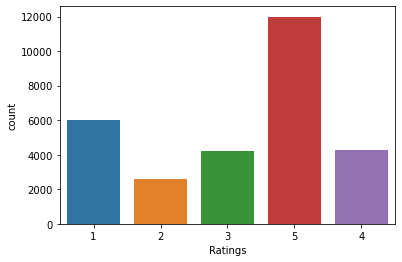

In [315]:
import seaborn as sb
sb.countplot(x='Ratings',data=data)

In [316]:
data.drop(data[data['Ratings']=='5'][:6992].index,inplace=True,axis=0)

In [317]:
data.drop(data[data['Ratings']=='1'][:988].index,inplace=True,axis=0)

<AxesSubplot:xlabel='Ratings', ylabel='count'>

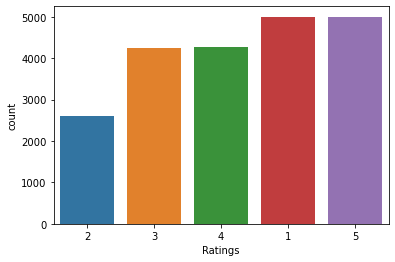

In [318]:
sb.countplot(x='Ratings',data=data)

In [319]:
data['Ratings'].value_counts()

5    5000
1    5000
4    4272
3    4233
2    2614
Name: Ratings, dtype: int64

In [320]:
data.shape

(21119, 2)

In [321]:
data=data.reset_index().drop('index',axis=1)

In [322]:
data.head()

,Reviews,Ratings
0,Poor,2
1,Paid for a 40 inch screen.. how ever we measur...,2
2,I brought this TV on June 16.\nAfter watching ...,2
3,I have some disapointed for this product becau...,2
4,Stopped working after 5 months of use..don’t buy,2


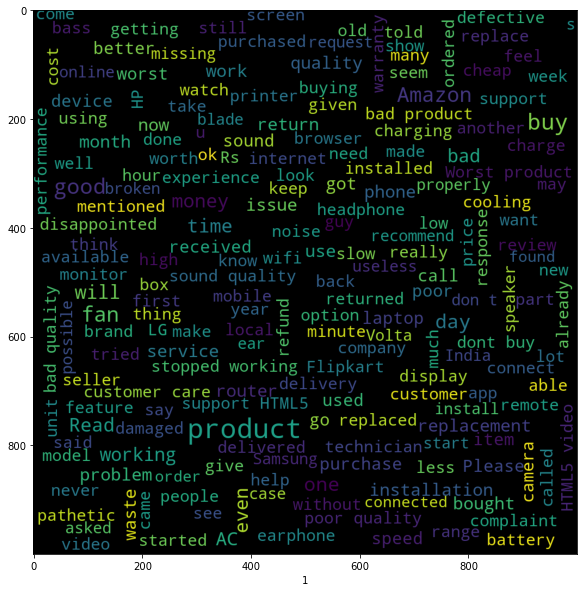

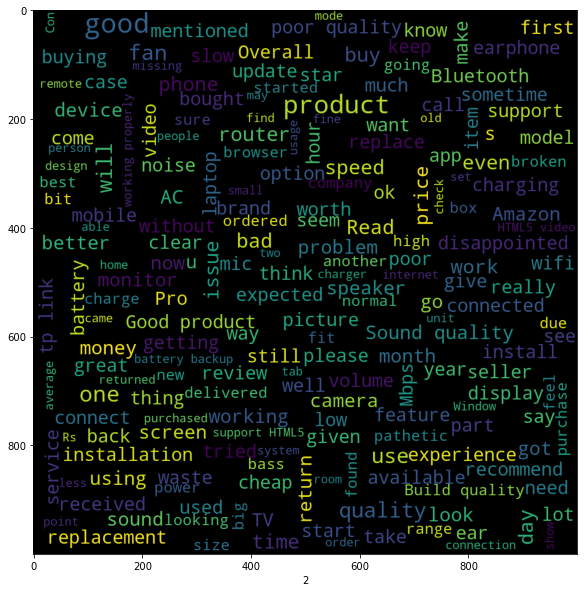

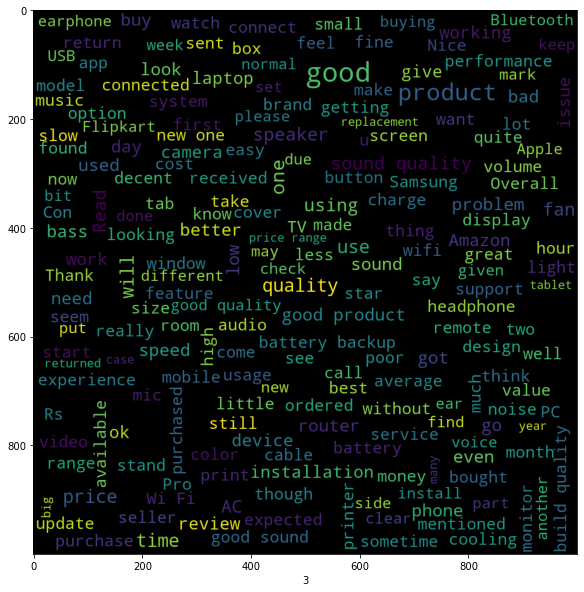

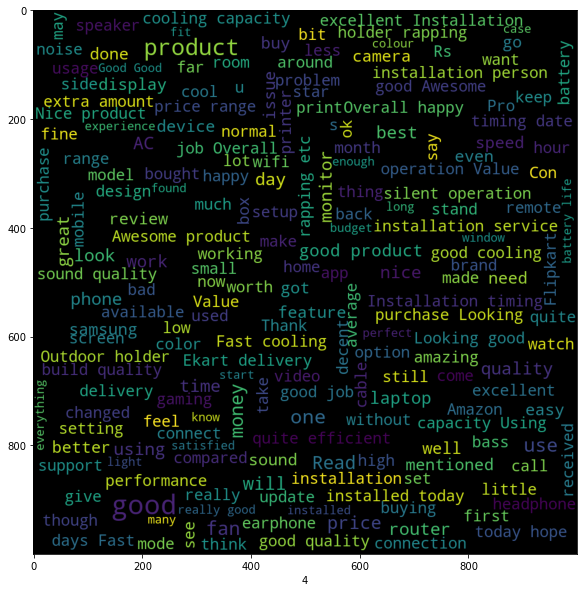

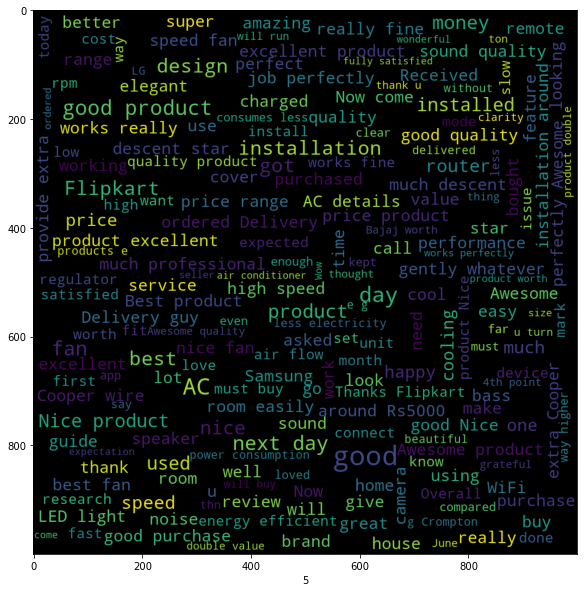

In [323]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for i in ['1','2','3','4','5']:
    text=data[data['Ratings']==i]['Reviews']
    word_cloud=WordCloud(max_font_size=50,width=1000, height=1000,max_words=200, relative_scaling=0.3).generate(' '.join(text))
    #plt.subplots()
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud)
    plt.xlabel(i)

## Data Preprocessing ./ Cleaning

In [324]:
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [325]:
def to_lower(text_col):
    return text_col.str.lower()

def remove_punctuations(text_col):
    return text_col.str.replace(r'[^\w\s]','').str.replace(r'\d','')

def remove_unwanted_spaces(text_col):
    return text_col.str.replace(r'\s{2,}','')

def remove_leading_trailing_spaces(text_col):
    return text_col.str.replace(r'^\s+|\s+$','')

def remove_single_letter_words(text_col):
    return text_col.str.replace(r'\s[a-z]\s',' ')

def remove_stopwords(text_col):
    Stopwords= set(stopwords.words('English')+ ['_'])
    text=[]
    for sentence in text_col:
        text.append(' '.join([word  for word in word_tokenize(sentence) if word not in Stopwords]))
    return text


def lemmatize(text_col):
    lemm=WordNetLemmatizer()
    text=[]
    for sentence in text_col:
        text.append(' '.join([lemm.lemmatize(word)  for word in word_tokenize(sentence)]))
    return text

In [326]:
def get_cleaned_text(text_col):
    
    lower=to_lower(text_col)
    punct_text=remove_punctuations(lower)
    spaces_removed=remove_unwanted_spaces(punct_text)
    lt_spaces=remove_leading_trailing_spaces(spaces_removed)
    remove_single_words=remove_single_letter_words(lt_spaces)
    stopwords=remove_stopwords(remove_single_words)
    
    cleaned_text=lemmatize(stopwords)
    
    return cleaned_text

In [327]:
data['length']=data['Reviews'].str.len()

In [328]:
data['Reviews']=get_cleaned_text(data['Reviews'])

In [329]:
data['cleaned_text_length']=data['Reviews'].str.len()

In [330]:
print('Raw data length :', data['length'].sum())
print('Cleaned data length :', data['cleaned_text_length'].sum())

Raw data length : 4446406
Cleaned data length : 2931527


In [331]:
data.head()

,Reviews,Ratings,length,cleaned_text_length
0,poor,2,4,4
1,paid ainch screen ever measured tape receivedi...,2,88,56
2,brought tv juneafter watching continuous thant...,2,298,199
3,disapointed product reason receive guide bookl...,2,369,239
4,stopped working aftermonths usedont buy,2,48,39


In [332]:
#### making word to vec model to convert text to vectors

In [333]:
sentence_list=[word_tokenize(sentence) for sentence in data['Reviews']]

In [334]:
sentence_list[-4]

['earphone', 'sound', 'quality', 'ok', 'packing', 'good']

In [335]:
w2v=Word2Vec(sentence_list,window=5 ,vector_size=1000 ,min_count=1)

In [336]:
w2v.wv.key_to_index

{'good': 0,
 'product': 1,
 'quality': 2,
 'fan': 3,
 'one': 4,
 'also': 5,
 'sound': 6,
 'ac': 7,
 'like': 8,
 'buy': 9,
 'installation': 10,
 'price': 11,
 'speed': 12,
 'dont': 13,
 'nice': 14,
 'time': 15,
 'working': 16,
 'work': 17,
 'router': 18,
 'money': 19,
 'day': 20,
 'get': 21,
 'much': 22,
 'use': 23,
 'even': 24,
 'read': 25,
 'service': 26,
 'bad': 27,
 'using': 28,
 'phone': 29,
 'got': 30,
 'better': 31,
 'look': 32,
 'best': 33,
 'camera': 34,
 'issue': 35,
 'delivery': 36,
 'go': 37,
 'amazon': 38,
 'really': 39,
 'low': 40,
 'cooling': 41,
 'support': 42,
 'battery': 43,
 'used': 44,
 'great': 45,
 'range': 46,
 'wifi': 47,
 'device': 48,
 'problem': 49,
 'well': 50,
 'review': 51,
 'bought': 52,
 'received': 53,
 'speaker': 54,
 'need': 55,
 'purchase': 56,
 'noise': 57,
 'design': 58,
 'awesome': 59,
 'high': 60,
 'poor': 61,
 'room': 62,
 'call': 63,
 'doesnt': 64,
 'laptop': 65,
 'value': 66,
 'return': 67,
 'overall': 68,
 'give': 69,
 'flipkart': 70,
 'instal

In [337]:
print('Vocabulary length',len(w2v.wv.index_to_key))

Vocabulary length 29234


In [338]:
## removing words not present in word 2 vec vocabulary
sentences=[]
ind=0
indexes=[]
for sentence in sentence_list:
    sent=( [word for word in sentence if word in w2v.wv.index_to_key])
    if(len(sent)==0):
        indexes.append(ind)
    else:
        sentences.append(sent)
    ind+=1

In [339]:
sentences[-4]

['earphone', 'sound', 'quality', 'ok', 'packing', 'good']

In [340]:
print('length of empty sentences' , len(indexes))

length of empty sentences 6


In [341]:
def sentence_to_vector(sentence,dim):
    return np.sum(w2v.wv[sentence],axis=0).reshape(1,dim)

In [342]:
train_vector=np.concatenate([sentence_to_vector(sentence,1000) for sentence in sentences])

In [343]:
train_vector.shape

(21113, 1000)

In [344]:
train=pd.DataFrame(train_vector)

In [345]:
Y_=data['Ratings'].drop(indexes,axis=0).astype('int')
Y_=Y_.reset_index().drop('index',axis=1)

In [346]:
train['target']=Y_['Ratings']

In [347]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
0,0.166808,0.003208,0.283778,0.160996,-0.045044,-0.043067,-0.026904,0.011735,-0.045487,0.040255,...,-0.120403,0.210323,0.158090,0.396432,0.076453,-0.113387,-0.204926,-0.129891,-0.209587,2
1,0.997971,-0.514720,0.681890,0.649008,0.093178,0.145673,-0.774513,-0.312883,1.069268,-0.099217,...,-1.248386,-0.022065,0.743407,1.766456,0.582471,-0.758947,-0.704686,-0.598096,-0.381155,2
2,3.065817,-1.089793,2.061620,1.708047,1.129090,0.587847,-3.158690,-2.297639,4.789622,-0.524600,...,-7.960506,0.473359,1.196275,9.690908,2.091771,-2.540934,-2.754311,-3.634611,-0.334818,2
3,5.479104,-2.914524,5.355834,2.629297,0.000330,-1.598551,-3.865857,1.087322,5.481123,0.885056,...,-6.060641,4.193685,2.679303,9.230794,2.325972,-2.370544,-3.082456,-4.629952,0.231325,2
4,0.608901,-0.059463,1.009691,-0.341961,0.126926,-0.226254,-0.308784,0.530710,0.597599,0.152791,...,-0.876659,-0.015008,0.173532,1.232209,0.680290,0.002758,-0.770486,-0.679008,0.517051,2


##### performing oversampling

In [348]:
from imblearn.over_sampling import SMOTE,ADASYN

smote=SMOTE(sampling_strategy='not majority')
x_sm,y_sm=smote.fit_resample(train.iloc[:,0:-1],train.iloc[:,-1])

In [349]:
train=pd.DataFrame(x_sm)
train['Ratings']=y_sm

In [350]:
train.shape

(25000, 1001)

In [351]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,Ratings
0,0.166808,0.003208,0.283778,0.160996,-0.045044,-0.043067,-0.026904,0.011735,-0.045487,0.040255,...,-0.120403,0.210323,0.158090,0.396432,0.076453,-0.113387,-0.204926,-0.129891,-0.209587,2
1,0.997971,-0.514720,0.681890,0.649008,0.093178,0.145673,-0.774513,-0.312883,1.069268,-0.099217,...,-1.248386,-0.022065,0.743407,1.766456,0.582471,-0.758947,-0.704686,-0.598096,-0.381155,2
2,3.065817,-1.089793,2.061620,1.708047,1.129090,0.587847,-3.158690,-2.297639,4.789622,-0.524600,...,-7.960506,0.473359,1.196275,9.690908,2.091771,-2.540934,-2.754311,-3.634611,-0.334818,2
3,5.479104,-2.914524,5.355834,2.629297,0.000330,-1.598551,-3.865857,1.087322,5.481123,0.885056,...,-6.060641,4.193685,2.679303,9.230794,2.325972,-2.370544,-3.082456,-4.629952,0.231325,2
4,0.608901,-0.059463,1.009691,-0.341961,0.126926,-0.226254,-0.308784,0.530710,0.597599,0.152791,...,-0.876659,-0.015008,0.173532,1.232209,0.680290,0.002758,-0.770486,-0.679008,0.517051,2


In [352]:
train['Ratings'].value_counts()

5    5000
4    5000
3    5000
2    5000
1    5000
Name: Ratings, dtype: int64

In [353]:
########################### Since we have crucial data we are considering 5 standard deviations while using zscore to remove outliers############
from scipy.stats import zscore
z=abs(zscore(train))
data_NOoutliers=train[(z<4).all(axis=1)]
print(train.shape,'\n',data_NOoutliers.shape)
print(train.shape[0]-data_NOoutliers.shape[0],'rows (i.e',"{:.2f}".format(((train.shape[0]-data_NOoutliers.shape[0])/train.shape[0])*100),'%) data removed as outliers')

(25000, 1001) 
 (23007, 1001)
1993 rows (i.e 7.97 %) data removed as outliers


In [354]:
data_NOoutliers.skew()

0          1.397174
1         -1.739120
2          1.390063
3          1.572068
4          1.522033
             ...   
996       -1.540014
997       -1.510360
998       -1.723599
999       -1.059958
Ratings    0.039923
Length: 1001, dtype: float64

In [355]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
ptrans=[]
for col in data_NOoutliers.columns:
    if(abs(data_NOoutliers[col].skew()) > 0.55):
        pt=PowerTransformer()
        pt.fit(data_NOoutliers[col].values.reshape(-1,1))
        data_NOoutliers[col]=pt.transform(data_NOoutliers[col].values.reshape(-1,1))
        ptrans.append([col,pt])

In [356]:
data_NOoutliers.skew()

0          0.085259
1          0.372649
2          0.103150
3          0.094606
4         -0.164502
             ...   
996       -0.127141
997       -0.113145
998       -0.170998
999        0.067979
Ratings    0.039923
Length: 1001, dtype: float64

In [357]:
Y=data_NOoutliers.iloc[:,-1]
X_=data_NOoutliers.iloc[:,0:-1]

In [358]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_)
X_scaled=sc.transform(X_)

In [359]:
X_scaled.shape

(23007, 1000)

In [360]:
Y.shape

(23007,)

#### performing PCA

In [361]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X=pca.fit_transform(X_scaled)

In [362]:
X.shape

(23007, 14)

In [363]:
Y.shape

(23007,)

## Model preparation

In [364]:
###preparing model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_curve,auc,accuracy_score, recall_score ,precision_score,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [365]:
x_train,x_test, y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=43, stratify=Y , shuffle=True)

In [366]:
# Preparing a method which will give all metrices score for the model we we will pass in the method parameter
def model_performance(train_x,train_y,test_x,test_y,model):
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('Accuracy Score :' , accuracy_score(test_y,pred))
    #print('Confusion matrix :\n',confusion_matrix(pred,test_y,labels=[1,2,3,4,5]))
    print('\nclassification_report :\n',classification_report(test_y,pred))
    print('\n\n')

<AxesSubplot:xlabel='0', ylabel='1'>

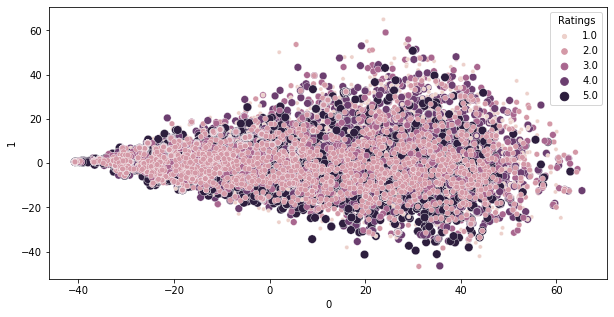

In [373]:
plt.figure(figsize=(10,5))
new=pd.DataFrame(X)
sb.scatterplot(x=new.iloc[:,0],y=new.iloc[:,1],hue=Y,size=Y)

In [367]:
models=[KNeighborsClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),
        RandomForestClassifier()]
for i,k in zip(models,['KNeighbor','DecisionTree','GBM','RandomForest']):
    print('******************************',k,'**************************************')
    model_performance(x_train,y_train,x_test,y_test,i)

****************************** KNeighbor **************************************
Accuracy Score : 0.6010430247718384

classification_report :
               precision    recall  f1-score   support

           1       0.62      0.62      0.62       923
           2       0.63      0.74      0.68       956
           3       0.59      0.59      0.59       947
           4       0.51      0.44      0.47       845
           5       0.63      0.60      0.61       931

    accuracy                           0.60      4602
   macro avg       0.60      0.60      0.60      4602
weighted avg       0.60      0.60      0.60      4602




****************************** DecisionTree **************************************
Accuracy Score : 0.6132116471099522

classification_report :
               precision    recall  f1-score   support

           1       0.65      0.61      0.63       923
           2       0.66      0.66      0.66       956
           3       0.64      0.61      0.62       947
    

In [368]:
#### Since RandomForest is giving  best results therefore trying to tune it to improve the score

In [374]:
def get_best_parameter(x,y,model,para_dict):
    grdsrch=GridSearchCV(estimator=model,param_grid=para_dict,cv=3, scoring='accuracy')
    grdsrch.fit(x,y)
    print('Best parameter',grdsrch.best_params_)
    #print('Best Score',grdsrch.best_score_)

In [375]:
model=RandomForestClassifier()
para_dict={'n_estimators':[100,500,1000,2000],'max_features':['auto','sqrt']}
get_best_parameter(X,Y,model,para_dict)

Best parameter {'max_features': 'sqrt', 'n_estimators': 1000}


In [376]:
para_dict2={'max_depth':range(5,20,3)}
get_best_parameter(X,Y,model,para_dict2)

Best parameter {'max_depth': 17}


In [377]:
para_dict3={'min_samples_split':[2,20,50]}
get_best_parameter(X,Y,model,para_dict3)

Best parameter {'min_samples_split': 2}


In [378]:
para_dict4={'min_samples_leaf':[1,3,5,7,11]}
get_best_parameter(X,Y,model,para_dict4)

Best parameter {'min_samples_leaf': 1}


In [398]:
x_train,x_test, y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=2, stratify=Y , shuffle=True)
model=RandomForestClassifier(n_estimators=2000 , max_features='sqrt',max_depth=17,min_samples_split=2,min_samples_leaf=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('Accuracy Score :' , accuracy_score(y_test,pred))
#print('Confusion matrix :\n',confusion_matrix(pred,test_y,labels=[1,2,3,4,5]))
print('\nclassification_report :\n',classification_report(y_test,pred))
print('\n\n')

Accuracy Score : 0.7018687527162103

classification_report :
               precision    recall  f1-score   support

           1       0.70      0.78      0.74       923
           2       0.80      0.76      0.78       956
           3       0.77      0.61      0.68       947
           4       0.63      0.58      0.60       845
           5       0.63      0.77      0.69       931

    accuracy                           0.70      4602
   macro avg       0.71      0.70      0.70      4602
weighted avg       0.71      0.70      0.70      4602






### Trying ANN to check if score can be improved

In [388]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [389]:
from kerastuner.tuners import RandomSearch

In [390]:
def model_builder(hp):
    model=Sequential()
    for i in range(hp.Int('unit',2,20)):
        model.add(Dense(units=hp.Int('units'+str(i),min_value=32 , max_value=512,step=32), activation='relu'))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[0.001,0.01])),
                    metrics=['accuracy'])
    return model

In [391]:
tuner=RandomSearch(
model_builder,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory='dir_ratings_3',
    project_name='Ratings_3'
)

In [392]:
tuner.search(x_train,y_train, batch_size=20,epochs= 5,validation_data=(x_test,y_test))

Trial 3 Complete [00h 04m 03s]
val_accuracy: 0.42492394149303436

Best val_accuracy So Far: 0.49174273014068604
Total elapsed time: 00h 07m 42s
INFO:tensorflow:Oracle triggered exit


In [ ]:
### Since ANN did not give better results hence selecting RandomForest as final model

In [394]:
model=RandomForestClassifier(n_estimators=1000 , max_features='sqrt',max_depth=11,min_samples_split=20,min_samples_leaf=7)
model.fit(x_train,y_train)


RandomForestClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=7,
                       min_samples_split=20, n_estimators=1000)